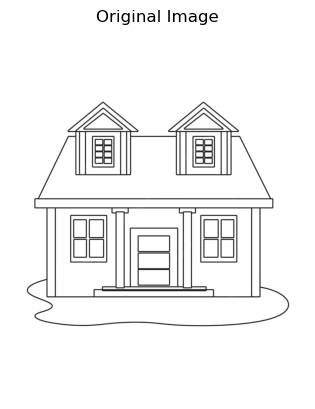

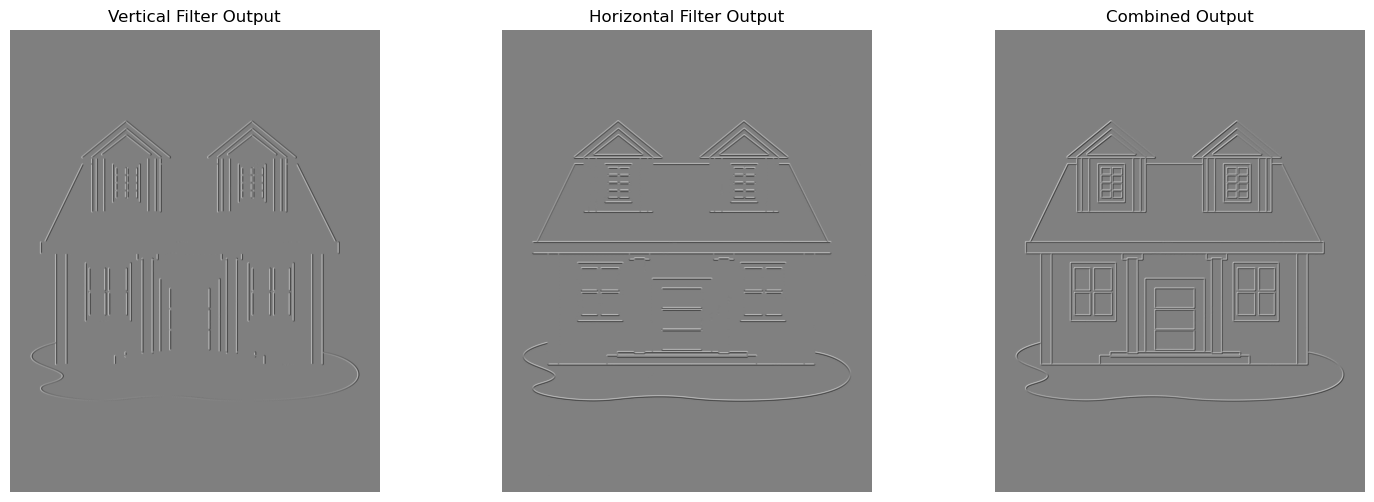

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 여기서 이미지를 가져올 디렉토리를 확인하고 싶다면

# import os

# print(os.getcwd())
# 위의 코드 사용

# 혹은 해당 이미지 파일을 오른클릭 후 속성을 들어가면 위치가 표시되며
# 해당 위치를 복사하여 붙여넣고 \를 /로 변경
image = Image.open('house.jpg').convert('L')

image = np.array(image)

plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

vertical_filter = np.array([[1, 0, -1],
                            [1, 0, -1],
                            [1, 0, -1]])

horizontal_filter = np.array([[1, 1, 1],
                              [0, 0, 0],
                              [-1, -1, -1]])

# a1 문제
def apply_filter(image, filter):
    # 이미지의 크기
    image_height, image_width = image.shape
    # 필터의 크기
    filter_height, filter_width = filter.shape
    
    # feature map을 위한 배열 초기화
    # 이미지 크기 - 필터 크기 + 1을 그대로 구현, 이미지의 크기의 경우 가로, 세로의 값이 다를 수 있어 각각 계산
    output_image = np.zeros((image_height - filter_height + 1, image_width - filter_width + 1))
    
    # 이미지의 일부(필터의 크기와 동일한)를 가져와 필터와 컨볼루션 연산
    # range(image_height - filter_height + 1)를 사용하는 이유는 필터가 이미지의 각 꼭짓점부분까지 가면
    # 이미지의 크기를 벗어나 없는 값에 접근하기 때문에 범위를 조절하여 필터가 이미지에서 벗어나지 않게 조절
    for i in range(image_height - filter_height + 1):
        # 위와 동일한 이유로 조절
        for j in range(image_width - filter_width + 1):
            # image[i:i+filter_height, j:j+filter_width]의 경우 i, j번째 이미지의 부분에 접근하여 필터의 크기만큼
            # 이미지를 가져와서 filter와 곱한 후 각 값을 모두 더하는 컨볼루션 연산 진행
            # 마지막으로 feature map의 해당하는 위치에 값을 넣어줌
            output_image[i, j] = np.sum(image[i:i+filter_height, j:j+filter_width] * filter)
    
    return output_image

# a2 문제
def apply_filter_stride(image, filter, stride=2):
    # 동일하게 이미지와 필터의 크기를 가져옴
    image_height, image_width = image.shape
    filter_height, filter_width = filter.shape
    
    # 이번에는 stride가 추가되었으며 기존의 경우 1씩 전진을 하였지만 이번에는 stride만큼 가기 때문에
    # 나누기를 통해서 feature map의 크기를 계산
    # 식의 경우 (이미지의 크기 - 필터의 크기) / stride + 1
    output_height = (image_height - filter_height) // stride + 1
    output_width = (image_width - filter_width) // stride + 1
    
    output_image = np.zeros((output_height, output_width))
    
    # range(a, b, c) : a 부터 b - 1까지 c만큼 건너뜀, 이 말은 stride 만큼 가져올 이미지의 위치를 조절
    for i in range(0, image_height - filter_height + 1, stride):
        # 위와 동일한 이유로 조절
        for j in range(0, image_width - filter_width + 1, stride):
            # feature map의 경우 i와 j의 값이 stride배 만큼 오르기 때문에 그만큼 값을 나누어주어야 함
            # 그 부분을 제외하고 뒷 부분은 a1과 동일
            output_image[i // stride, j // stride] = np.sum(image[i:i+filter_height, j:j+filter_width] * filter)
    
    return output_image


vertical_output = apply_filter(image, vertical_filter)

horizontal_output = apply_filter(image, horizontal_filter)

combined_output = vertical_output + horizontal_output

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(vertical_output, cmap='gray')
ax[0].set_title('Vertical Filter Output')
ax[0].axis('off')
ax[1].imshow(horizontal_output, cmap='gray')
ax[1].set_title('Horizontal Filter Output')
ax[1].axis('off')
ax[2].imshow(combined_output, cmap='gray')
ax[2].set_title('Combined Output')
ax[2].axis('off')
plt.show()

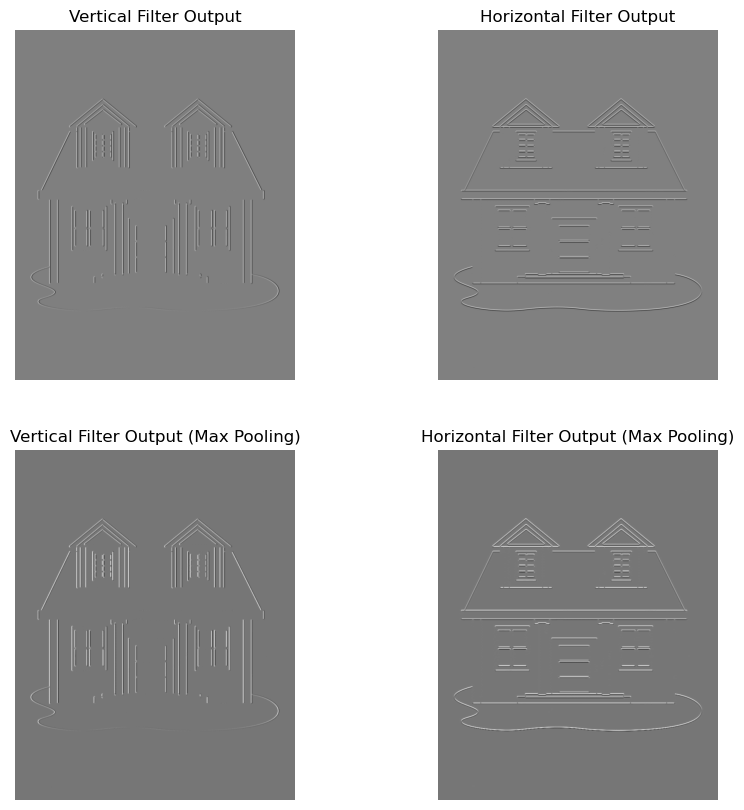

In [2]:
# b1 문제
def max_pooling(image, pool_size):
    # a1, 2와 동일하게 이미지의 크기와 pooling size(나눌 영역의 크기)를 가져옴
    image_height, image_width = image.shape
    pool_height, pool_width = pool_size

    # stride와는 조금 다르게 출력 데이터는 입력 데이터에 pooling size를 나누어 줌
    output_height = image_height // pool_height
    output_width = image_width // pool_width
    output_image = np.zeros((output_height, output_width))

    # a2에서 설명한 부분과 동일
    for i in range(0, output_height * pool_height, pool_height):
        for j in range(0, output_width * pool_width, pool_width):
            # output의 배열에 접근하는 방식 또한 a2와 동일
            # 이번에는 컨볼루션 연산 대신 np.max로 해당 영역에서 가장 큰 값을 가져옴
            # average pooling의 경우 np.mean 사용
            output_image[i // pool_height, j // pool_width] = np.max(image[i:i+pool_height, j:j+pool_width])
    
    return output_image

vertical_output_pool = max_pooling(vertical_output, (2, 2))
horizontal_output_pool = max_pooling(horizontal_output, (2, 2))

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(vertical_output, cmap='gray')
ax[0, 0].set_title('Vertical Filter Output')
ax[0, 0].axis('off')
ax[0, 1].imshow(horizontal_output, cmap='gray')
ax[0, 1].set_title('Horizontal Filter Output')
ax[0, 1].axis('off')
ax[1, 0].imshow(vertical_output_pool, cmap='gray')
ax[1, 0].set_title('Vertical Filter Output (Max Pooling)')
ax[1, 0].axis('off')
ax[1, 1].imshow(horizontal_output_pool, cmap='gray')
ax[1, 1].set_title('Horizontal Filter Output (Max Pooling)')
ax[1, 1].axis('off')
plt.show()